In [1]:
import sim_modules as sm
import numpy as np
import matplotlib.pyplot  as plt
import sys 
import input as input 
import os

size= input.size
path= input.path
cols = 2*size

for number in range(input.num_participants)[0:2]:
    
    csvnum = number+1
    file = path+'%i.csv'%csvnum
    data = np.loadtxt(file, skiprows=1, usecols=range(0,cols), delimiter=',')
    matContemp = data[:,size:] #same day (contemporaneous) beta values
    matLagged = data[:,:size] #lagged beta values
    
    if input.covContempName=='randn':
        covContemp = np.random.randn(size,size)
    else:
        covContemp = np.ones(size)

    if input.covLaggedName=='randn':
        covLagged = np.random.randn(size,size)
    else:
        covLagged =np.ones(size)

    if input.measurecovName=='diag':
       measureCov= input.ampMeasure*np.eye(size)

    
    savepath=path+'sims/numParticipants_%s/mask_%s/'%(input.num_participants,str(input.maskZero))
    try:
        os.makedirs(savepath)
    except:
        print('directory exists')

    for j in range(input.num_iterations):
        if input.maskZero:
            maskContemp =  sm.make_mask(matContemp, contemp=True)
            maskLagged = sm.make_mask(matLagged, contemp=False)
        else:
            maskContemp =  np.ones((input.size, input.size))
            np.fill_diagonal(maskContemp,0) # still make diagonal zeros
            maskLagged = np.ones((input.size, input.size))
        
        samples = sm.generate_timeseries(input.start, input.steps, input.ampContemp, matContemp, covContemp, input.ampLagged, matLagged, covLagged,measureCov)

        if input.clip_samples:
        # Checking the clipping
            samples_clip = sm.clip_timeseries(samples, input.clip_indices, input.clip_mins, input.clip_maxs)
        
        savefile = savepath+'Series_t%s_covContemp%s_contempAmp%2.2f_covLagged%s_laggedAmp_%2.2f_measureCov%s_measureAmp%2.2f_iter%i.txt'%(input.steps,input.covContempName,input.ampContemp,input.covLaggedName,input.ampLagged,input.measurecovName,input.ampMeasure,j)
        np.savetxt(savefile,samples, delimiter=',')

directory exists


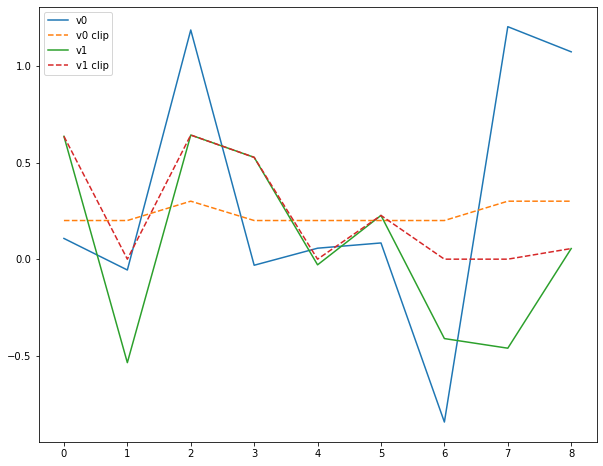

In [3]:



# # matComptempNoisy = sm.coeff_draw_from_cov(ampContemp,matContemp,covContemp,maskContemp)
# # matLaggedNoisy = sm.coeff_draw_from_cov(ampLagged,matLagged,covLagged,maskLagged)

# samples = sm.generate_timeseries(start, steps, ampContemp, matContemp, covContemp, ampLagged, matLagged, covLagged,measurecov)
# # Checking the clipping
# samples_clip = sm.clip_timeseries(samples, [0,1], [0.2,0], [0.3,1])
# savepath=path+'/sims/Series_t%s_covContemp%s_contempAmp%2.2f_covLagged%s_laggedAmp_%2.2f_measureCov%s_measureAmp%2.2f.txt'%(steps,covContempName,ampContemp,covLaggedName,ampLagged,measurecovName,ampMeasure)
# #print(savepath)
# #np.savetxt(savepath, samples,delimiter=',')
# fig=plt.figure(3, figsize=(10,8))
# fig.patch.set_facecolor('white')

# for i in range(size)[0:2]:
#     plt.plot(samples[:,i], label='v%i'%i)
#     plt.plot(samples_clip[:,i], linestyle='--',label='v%i clip'%i)

# plt.legend(loc='best')

In [ ]:
fig=plt.figure(3, figsize=(10,8))
fig.patch.set_facecolor('white')

for i in range(size):
    plt.plot(samples[:,i], label='v%i'%i)
    print("Measured sig = %2.2f, input sig = %2.2f" %(np.std(samples[:,i]), ampMeasure))
plt.ylim([-3,3])
plt.xlabel('Time step', fontsize=20)
plt.ylabel('Variable', fontsize=20)
plt.legend(loc='best')
plt.savefig('samples_amplitude%2.2f_lagamp%2.2f.png'%(ampMeasure, ampLagged))
